In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras
import tensorflow as tf
from tensorflow import keras as K

print('Keras: {}'.format(keras.__version__))
print('Tensorflow: {}'.format(tf.__version__))

/opt/Anaconda3_5.2.0.1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Keras: 2.2.0
Tensorflow: 1.8.0


## Data-preprocessing

* Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).           

- uint8 arrays of grayscale image data with shapes (num_samples, 28, 28).                        
- uint8 arrays of digit labels (integers in range 0-9) with shapes (num_samples,)

In [2]:
def load_dataset():
    '''Data wrangling and loading training, validation and test set
    '''
    # load dataset
    (train_images, train_labels), (test_images, test_labels) = K.datasets.mnist.load_data(path='/opt/aiml4it-share/public-training-sets/mnist/mnist.npz')
    
    # print shape of dataset
    print("Training Set: {}, Testing Set: {}".format(train_images.shape, test_images.shape))
    
    # splitting train images to make validation set for training purposes
    val_images = train_images[50000:]
    val_labels = train_labels[50000:]

    train_images = train_images[:50000]
    train_labels = train_labels[:50000]

    # convert class vectors to binary class matrices
    print(train_labels.shape)
    #train_labels = K.utils.to_categorical(train_labels) 
    print(train_labels.shape)
    #val_labels = K.utils.to_categorical(val_labels) 
    print(val_labels.shape)
    #test_labels = K.utils.to_categorical(test_labels)
    print(test_labels.shape)
    
    print('----------------------------------------------------------')
    print('Training set:{}, validation set:{}, test set:{}' .format(train_images.shape, val_images.shape, test_images.shape))
    print('-----------------------------------------------------------')
    
    return train_images, train_labels, val_images, val_labels, test_images, test_labels

In [3]:
train_images, train_labels, val_images, val_labels, test_images, test_labels = load_dataset()

Training Set: (60000, 28, 28), Testing Set: (10000, 28, 28)
(50000,)
(50000,)
(10000,)
(10000,)
----------------------------------------------------------
Training set:(50000, 28, 28), validation set:(10000, 28, 28), test set:(10000, 28, 28)
-----------------------------------------------------------


In [4]:
def scale_pixels(train, val, test):
    '''Normalize pixels values and expanding the dimensions from (28, 28) to (28, 28, 1)
    '''
    # Convert from integer to float values
    train, val, test = train.astype('float32'), val.astype('float32'), test.astype('float32')
    
    # Scale pixels between [0, 1]
    train, val, test = train / 255.0, val / 255.0, test / 255.0
    
    # Expanding the dimension of the images to make it (28, 28, 1)
    train, val, test  = np.expand_dims(train, axis=-1), np.expand_dims(val, axis=-1), np.expand_dims(test, axis=-1)
    
    print('Extending the dimensions of dataset: ')
    print('Training set:{}, validation set:{}, test set:{}' .format(train.shape, val.shape, test.shape))
    
    return train, val, test

In [5]:
train_images, val_images, test_images = scale_pixels(train_images, val_images, test_images)

Extending the dimensions of dataset: 
Training set:(50000, 28, 28, 1), validation set:(10000, 28, 28, 1), test set:(10000, 28, 28, 1)


In [6]:
def cnn_model():
    # Model arhitecture
    inputs = K.layers.Input(shape=(28, 28, 1))
    c = K.layers.Conv2D(32, (3, 3), padding='valid', activation='relu')(inputs)
    m = K.layers.MaxPool2D((2,2), (2, 2))(c)
    d = K.layers.Dropout(0.5)(m)
    c = K.layers.Conv2D(64, (3, 3), padding='valid', activation='relu')(d)
    m = K.layers.MaxPool2D((2,2), (2, 2))(c)
    d = K.layers.Dropout(0.5)(m)
    c = K.layers.Conv2D(128, (3, 3), padding='valid', activation='relu')(d)
    f = K.layers.Flatten()(c)
    outputs = K.layers.Dense(10, activation=tf.nn.softmax, name='preds')(f)

    # Creating model object by inserting inputs and outputs to the model
    model = K.models.Model(inputs, outputs)

    # Compilation of the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [7]:
def loss_accuracy(model):
    plt.plot(model.history['acc'], label='train_accu')
    plt.plot(model.history['val_acc'], label = 'val_accu')
    plt.plot(model.history['loss'], label='train_loss')
    plt.plot(model.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy/loss')
    plt.legend()

Training Set: (60000, 28, 28), Testing Set: (10000, 28, 28)
(50000,)
(50000,)
(10000,)
(10000,)
----------------------------------------------------------
Training set:(50000, 28, 28), validation set:(10000, 28, 28), test set:(10000, 28, 28)
-----------------------------------------------------------
Extending the dimensions of dataset: 
Training set:(50000, 28, 28, 1), validation set:(10000, 28, 28, 1), test set:(10000, 28, 28, 1)
Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 36s 727us/step - loss: 0.2638 - acc: 0.9162 - val_loss: 0.0619 - val_acc: 0.9827
Epoch 2/2
50000/50000 [==============================] - 36s 723us/step - loss: 0.0875 - acc: 0.9720 - val_loss: 0.0446 - val_acc: 0.9866
--------------------------------------
Test loss and test accuracy: 0.03612234162511304 ... 98.82
--------------------------------------


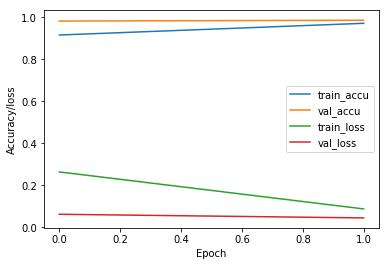

In [8]:
epochs = 2
# load dataset
train_images, train_labels, val_images, val_labels, test_images, test_labels = load_dataset()
# Scale images
train_images, val_images, test_images = scale_pixels(train_images, val_images, test_images)
# Model
model = cnn_model()
# Fit model
model.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels))
# Plots for accuracy and loss
loss_accuracy(model.history)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('--------------------------------------')
print('Test loss and test accuracy: {} ... {}'.format(test_loss, test_acc*100))
print('--------------------------------------')

## Exploratory Data Analysis

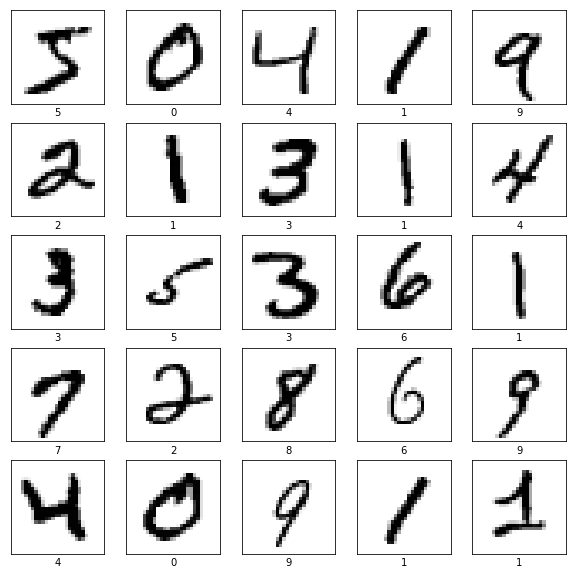

In [14]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# Activation Maximization

Generate an input image that maximizes the filter output activation


Activation maximization as name indicates, aims to maximizes the activation of a certain neuron. In training weights are modified iteratively until we reach we reach loss minima(or stop training). In activation maximization we will keep the weights and the desired output and we will modify the input such that it maximizes the activation of the neuron.This allow us to understand what sort of input patterns activate a particular filter i.e There are 9 filters in our network, we can see which pattern of zero filter that activates for a presence of zero within input image.

To visualize activation over final dense layer: 
* We need to change softmax activation to linear 
* since gradients of output node will depend on all the other node activations. Lets start by visualizing input that maximizes the output node 0.

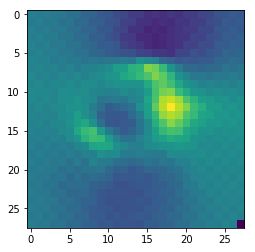

In [18]:
from vis.visualization import visualize_activation
from vis.utils import utils

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')
# Swap softmax with linear
model.layers[layer_idx].activation = K.activations.linear
model = utils.apply_modifications(model)

filter_idx = 9
img = visualize_activation(model, layer_idx, filter_indices=filter_idx)
plt.imshow(img[..., 0])

Its look like similar to zero, but not clear. Activation maximization is notorious because regularization parameters need to be tuned depending on the problem.

- Input image is preprocess between (0, 1)                 
- The regularization defualt parameters might be dominating activation maximization loss weight.(Use verbose=True and examine losses )

In [1]:
# Normalize between [0,1]

img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.))
plt.imshow(img[..., 0])

NameError: name 'visualize_activation' is not defined

Much better but still noisy. Lets examine the losses with verbose=True and tunning the weights

Iteration: 1, named_losses: [('ActivationMax Loss', 0.16668025),
 ('L-6.0 Norm Loss', 0.019828254),
 ('TV(2.0) Loss', 0.093550935)], overall loss: 0.28005945682525635
Iteration: 2, named_losses: [('ActivationMax Loss', 5.306652),
 ('L-6.0 Norm Loss', 0.1722689),
 ('TV(2.0) Loss', 601.5913)], overall loss: 607.0702514648438
Iteration: 3, named_losses: [('ActivationMax Loss', -27.908113),
 ('L-6.0 Norm Loss', 0.1622442),
 ('TV(2.0) Loss', 103.7192)], overall loss: 75.97332763671875
Iteration: 4, named_losses: [('ActivationMax Loss', -59.20195),
 ('L-6.0 Norm Loss', 0.16924511),
 ('TV(2.0) Loss', 115.21922)], overall loss: 56.186519622802734
Iteration: 5, named_losses: [('ActivationMax Loss', -85.541115),
 ('L-6.0 Norm Loss', 0.17725049),
 ('TV(2.0) Loss', 110.86712)], overall loss: 25.503257751464844
Iteration: 6, named_losses: [('ActivationMax Loss', -112.19385),
 ('L-6.0 Norm Loss', 0.2026965),
 ('TV(2.0) Loss', 92.426575)], overall loss: -19.5645751953125
Iteration: 7, named_losses: [

Iteration: 121, named_losses: [('ActivationMax Loss', -379.53125),
 ('L-6.0 Norm Loss', 0.6013734),
 ('TV(2.0) Loss', 207.53468)], overall loss: -171.3951873779297
Iteration: 122, named_losses: [('ActivationMax Loss', -377.8849),
 ('L-6.0 Norm Loss', 0.6009479),
 ('TV(2.0) Loss', 204.34454)], overall loss: -172.93939208984375
Iteration: 123, named_losses: [('ActivationMax Loss', -379.9764),
 ('L-6.0 Norm Loss', 0.6022525),
 ('TV(2.0) Loss', 207.41478)], overall loss: -171.95936584472656
Iteration: 124, named_losses: [('ActivationMax Loss', -379.7238),
 ('L-6.0 Norm Loss', 0.6022527),
 ('TV(2.0) Loss', 207.10692)], overall loss: -172.0146026611328
Iteration: 125, named_losses: [('ActivationMax Loss', -381.444),
 ('L-6.0 Norm Loss', 0.60309917),
 ('TV(2.0) Loss', 210.09526)], overall loss: -170.7456512451172
Iteration: 126, named_losses: [('ActivationMax Loss', -381.36703),
 ('L-6.0 Norm Loss', 0.6016845),
 ('TV(2.0) Loss', 210.10806)], overall loss: -170.65728759765625
Iteration: 127, n

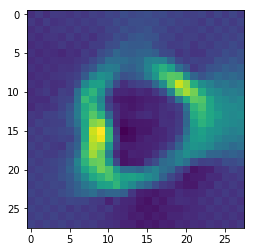

In [19]:
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), verbose=True)
plt.imshow(img[..., 0])

activation loss is not bouncing bouncing around and converging. Perhaps we could get that loss to be lower by reducing weights of other losses that might be dominating

The simplest way to tune these weights is to first start with 0. weights for all regularization losses.

Iteration: 1, named_losses: [('ActivationMax Loss', 0.1495506)], overall loss: 0.14955060184001923
Iteration: 2, named_losses: [('ActivationMax Loss', 1.2511075)], overall loss: 1.2511074542999268
Iteration: 3, named_losses: [('ActivationMax Loss', -69.15636)], overall loss: -69.15635681152344
Iteration: 4, named_losses: [('ActivationMax Loss', -151.63704)], overall loss: -151.6370391845703
Iteration: 5, named_losses: [('ActivationMax Loss', -235.56026)], overall loss: -235.5602569580078
Iteration: 6, named_losses: [('ActivationMax Loss', -302.949)], overall loss: -302.9490051269531
Iteration: 7, named_losses: [('ActivationMax Loss', -363.6866)], overall loss: -363.6866149902344
Iteration: 8, named_losses: [('ActivationMax Loss', -425.84232)], overall loss: -425.8423156738281
Iteration: 9, named_losses: [('ActivationMax Loss', -480.28748)], overall loss: -480.2874755859375
Iteration: 10, named_losses: [('ActivationMax Loss', -532.5834)], overall loss: -532.5833740234375
Iteration: 11, 

Iteration: 129, named_losses: [('ActivationMax Loss', -4498.8286)], overall loss: -4498.82861328125
Iteration: 130, named_losses: [('ActivationMax Loss', -4530.519)], overall loss: -4530.51904296875
Iteration: 131, named_losses: [('ActivationMax Loss', -4560.5986)], overall loss: -4560.5986328125
Iteration: 132, named_losses: [('ActivationMax Loss', -4593.36)], overall loss: -4593.35986328125
Iteration: 133, named_losses: [('ActivationMax Loss', -4624.6943)], overall loss: -4624.6943359375
Iteration: 134, named_losses: [('ActivationMax Loss', -4657.1597)], overall loss: -4657.15966796875
Iteration: 135, named_losses: [('ActivationMax Loss', -4688.939)], overall loss: -4688.93896484375
Iteration: 136, named_losses: [('ActivationMax Loss', -4719.839)], overall loss: -4719.8388671875
Iteration: 137, named_losses: [('ActivationMax Loss', -4750.6523)], overall loss: -4750.65234375
Iteration: 138, named_losses: [('ActivationMax Loss', -4783.538)], overall loss: -4783.5380859375
Iteration: 13

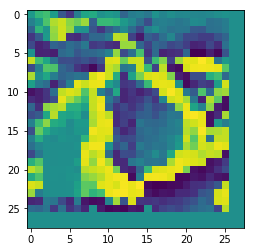

In [20]:
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), 
                           tv_weight=0., lp_norm_weight=0., verbose=True)
plt.imshow(img[..., 0])

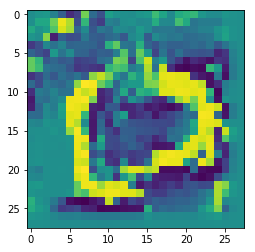

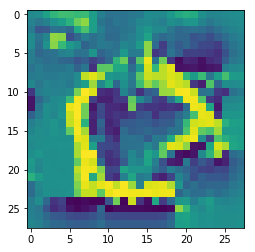

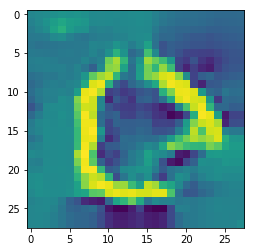

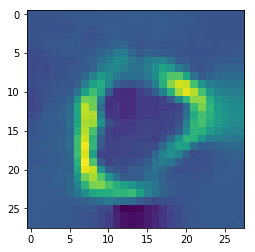

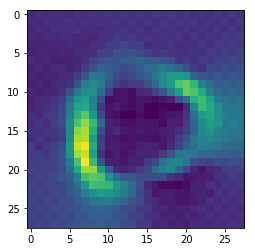

In [21]:
for tv_weight in [1e-3, 1e-2, 1e-1, 1, 10]:
    # Lets turn off verbose output this time to avoid clutter and just see the output.
    img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), 
                               tv_weight=tv_weight, lp_norm_weight=0.)
    plt.figure()
    plt.imshow(img[..., 0])

We can see how total variation losses pushing blobiness. Showing how weights can be tuned for we can see how weights can be tuned.

Visualize all other output categories and see its results.

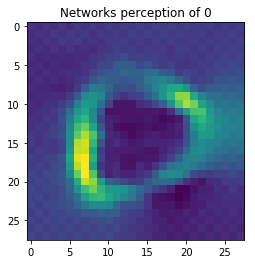

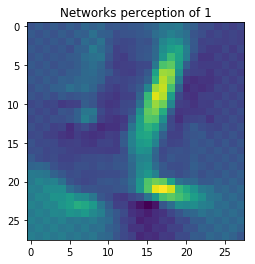

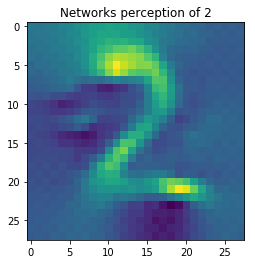

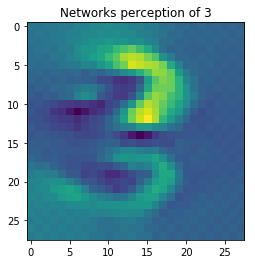

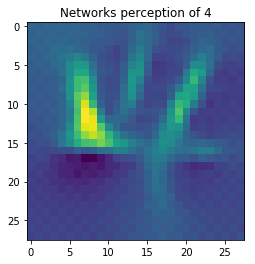

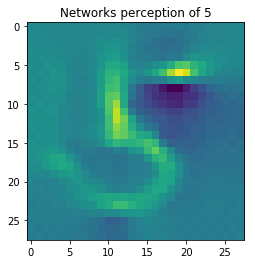

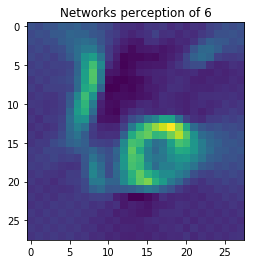

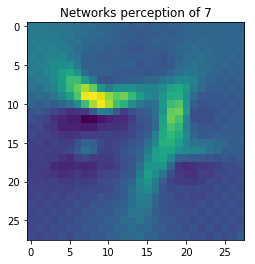

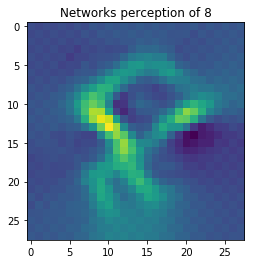

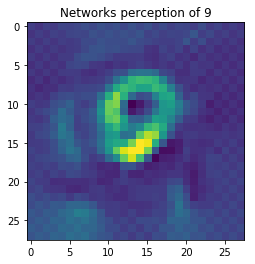

In [22]:
for output_idx in np.arange(10):
    # Lets turn off verbose output this time to avoid clutter and just see the output.
    img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
    plt.figure()
    plt.title('Networks perception of {}'.format(output_idx))
    plt.imshow(img[..., 0])

Visualize and even generate input images via backprop

Useful for multi-label classifiers, we can generate input that network thinks is both 1 and 7 simultaneously. Its like asking the network. 
- Generate input image you think is both 1 and 7

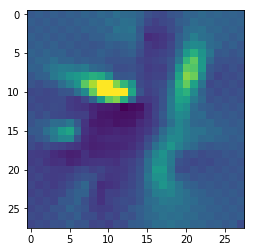

In [118]:
img = visualize_activation(model, layer_idx, filter_indices=[1, 7], input_range=(0., 1.))
plt.imshow(img[..., 0])

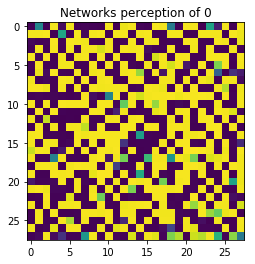

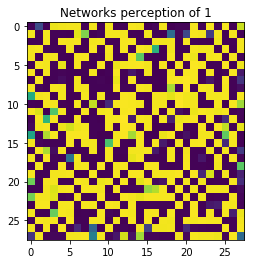

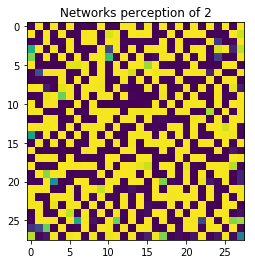

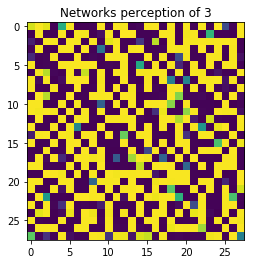

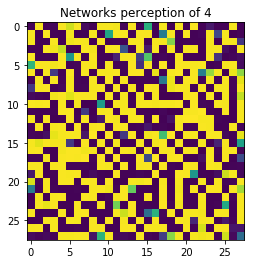

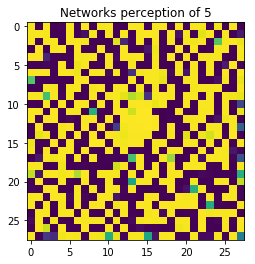

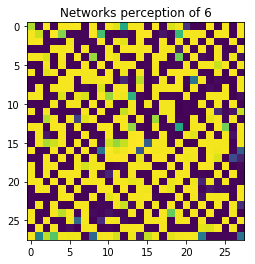

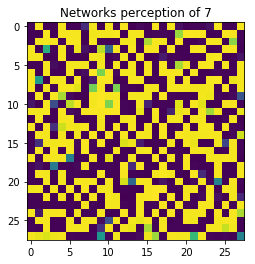

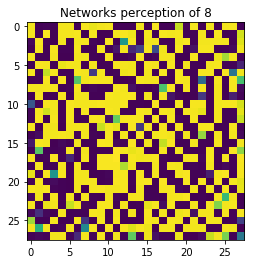

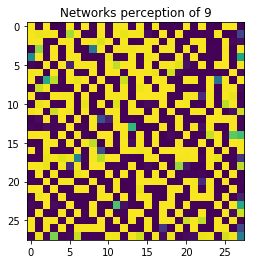

In [120]:
# Swap linear back with softmax
model.layers[layer_idx].activation = K.activations.softmax
model = utils.apply_modifications(model)

for output_idx in np.arange(10):
    # Lets turn off verbose output this time to avoid clutter and just see the output.
    img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
    plt.figure()
    plt.title('Networks perception of {}'.format(output_idx))
    plt.imshow(img[..., 0])

Doesn't work becasue maximizing output node, can be done by minimizing other outputs. Softmax is wierd that way, it is the only activation that depends on other outputs